In [1]:
import cv2
import os
import PIL
import skimage
from skimage import data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc
from random import sample


In [2]:
HEIGHT=112
WIDTH = 56
sizeofimageName= str(HEIGHT)+'*'+str(WIDTH)
#how many dataset want to create, and -1
DATASETNUMBER = 10
#create 9 

In [3]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    image_name=[]
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
            image_name.append(str(f))
    return images, labels,image_name

In [4]:
ROOT_PATH = '/home/tang/targa/exp4/generateNewData/lightGeneration'

totaldir = 'size'+str(HEIGHT)+'*'+str(WIDTH)+'/total_data'
total_data_directory = os.path.join(ROOT_PATH, totaldir)

In [5]:
total_data_directory

'/home/tang/targa/exp4/generateNewData/lightGeneration/size112*56/total_data'

In [6]:
#os.listdir(total_data_directory+'/0')

Images,Labels,Image_names = load_data(total_data_directory)

os.path.basename(Image_names[0])

Image_names[7]

'/home/tang/targa/exp4/generateNewData/lightGeneration/size112*56/total_data/J/J_possionnoise_9lamda_23.jpg'

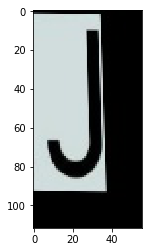

In [7]:
plt.imshow(Images[0])

In [8]:
Labels[0]

'J'

In [9]:
len(Labels)

22784

In [10]:
#########define percentage of dataset
# total_number = len(Labels)
# train_number = int(total_number*float(0.8000))
# test_number = int(total_number*float(0.1000))
# validation_number = total_number-train_number-test_number

# print('- Training-set:\t\t{}'.format(train_number))
# print('- Test-set:\t\t{}'.format(test_number))
# print('- Validation-set:\t{}'.format(validation_number))



In [11]:
SAVE_PATH = '/home/tang/targa/exp4/trainingOriginal/lightTransformation'
experiment_path= os.path.join(SAVE_PATH,'splitData/')

In [12]:
for datasetnumber in range(1,DATASETNUMBER):
    SEED=datasetnumber+100
    print('this is the dataset of:'+str(datasetnumber))
    ordersplit=str(datasetnumber)+'SplitDataset'
    experiment_data_directory = os.path.join(experiment_path,ordersplit)
    if not os.path.exists(experiment_data_directory):
        os.makedirs(experiment_data_directory)
    train_data_directory = os.path.join(experiment_data_directory, sizeofimageName+"/train")
    test_data_directory = os.path.join(experiment_data_directory, sizeofimageName+"/test")
    validation_data_directory = os.path.join(experiment_data_directory, sizeofimageName+"/validation")
    if not os.path.exists(train_data_directory):
        os.makedirs(train_data_directory)
    if not os.path.exists(test_data_directory):
        os.makedirs(test_data_directory)
    if not os.path.exists(validation_data_directory):
        os.makedirs(validation_data_directory)
    for label in Labels:
        trainlabels_directory = os.path.join(train_data_directory, label)
        testlabels_directory = os.path.join(test_data_directory, label)
        validationlabels_directory = os.path.join(validation_data_directory, label)
        if not os.path.exists(trainlabels_directory):
            os.makedirs(trainlabels_directory)
        if not os.path.exists(testlabels_directory):
            os.makedirs(testlabels_directory)
        if not os.path.exists(validationlabels_directory):
            os.makedirs(validationlabels_directory)
    #########define percentage of dataset
    total_number = len(Labels)
    train_number = int(total_number*float(0.8000))
    test_number = int(total_number*float(0.1000))
    validation_number = total_number-train_number-test_number
    totalset_index = []
    trainset_index = []
    testset_index=[]
    validationset_index=[]
    

#     print('- Training-set:\t\t{}'.format(train_number))
#     print('- Test-set:\t\t{}'.format(test_number))
#     print('- Validation-set:\t{}'.format(validation_number))
    #########generate total images index
    for i in range(0,len(Labels)):
        totalset_index.append(str(i))

    random.seed(SEED)
    trainset_index = sample(totalset_index,train_number)

    print('- Total-set index length:\t{}'.format(len(totalset_index)))
    print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
    print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
    print('- Validation-set index length:\t{}'.format(len(validationset_index)))
    print('\n')
    for i in trainset_index:
        filename = train_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
        plt.imsave(filename,Images[int(i)])
        #print(filename)
        totalset_index.remove(i)

    print('- Total-set index length:\t{}'.format(len(totalset_index)))
    print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
    print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
    print('- Validation-set index length:\t{}'.format(len(validationset_index)))
    print('\n')
    random.seed(SEED)
    testset_index= sample(totalset_index,test_number)

    for i in testset_index:
        filename = test_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
        plt.imsave(filename,Images[int(i)])
        #print(filename)
        totalset_index.remove(i)


    print('- Total-set index length:\t{}'.format(len(totalset_index)))
    print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
    print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
    print('- Validation-set index length:\t{}'.format(len(validationset_index)))
    print('\n')
    random.seed(SEED)
    validationset_index= sample(totalset_index,validation_number)

    for i in validationset_index:
        filename = validation_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
        plt.imsave(filename,Images[int(i)])
        #print(filename)
        totalset_index.remove(i)

    print('- Total-set index length:\t{}'.format(len(totalset_index)))
    print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
    print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
    print('- Validation-set index length:\t{}'.format(len(validationset_index)))
    print('\n')
    print('\n')
    print('*************************************')


this is the dataset of:1
- Total-set index length:	22784
- Training-set index length:		18227
- Testing-set index length:		0
- Validation-set index length:	0


- Total-set index length:	4557
- Training-set index length:		18227
- Testing-set index length:		0
- Validation-set index length:	0


- Total-set index length:	2279
- Training-set index length:		18227
- Testing-set index length:		2278
- Validation-set index length:	0


- Total-set index length:	0
- Training-set index length:		18227
- Testing-set index length:		2278
- Validation-set index length:	2279




*************************************
this is the dataset of:2
- Total-set index length:	22784
- Training-set index length:		18227
- Testing-set index length:		0
- Validation-set index length:	0


- Total-set index length:	4557
- Training-set index length:		18227
- Testing-set index length:		0
- Validation-set index length:	0


- Total-set index length:	2279
- Training-set index length:		18227
- Testing-set index length:		2278
- V

In [13]:
##########create train test and validation directory
# if not os.path.exists(train_data_directory):
#     os.makedirs(train_data_directory)
# if not os.path.exists(test_data_directory):
#     os.makedirs(test_data_directory)
# if not os.path.exists(validation_data_directory):
#     os.makedirs(validation_data_directory)


In [14]:
#########make label directory


In [15]:
################KEEP distribution all the same pseudo-random
random.seed(3)
# for i in range(5):
#     print(random.randint(1,100))

In [16]:
a=[]
for i in range(50):
    a.append(i)
    

In [17]:
sample(a,5)

[15, 37, 34, 8, 23]

In [18]:
#########generate total images index
# for i in range(0,len(Labels)):
#     totalset_index.append(str(i))

# random.seed(SEED)
# trainset_index = sample(totalset_index,train_number)

# print('- Total-set index length:\t{}'.format(len(totalset_index)))
# print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
# print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
# print('- Validation-set index length:\t{}'.format(len(validationset_index)))

# for i in trainset_index:
#     filename = train_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
#     plt.imsave(filename,Images[int(i)])
#     #print(filename)
#     totalset_index.remove(i)

# print('- Total-set index length:\t{}'.format(len(totalset_index)))
# print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
# print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
# print('- Validation-set index length:\t{}'.format(len(validationset_index)))

# random.seed(SEED)
# testset_index= sample(totalset_index,test_number)

# for i in testset_index:
#     filename = test_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
#     plt.imsave(filename,Images[int(i)])
#     #print(filename)
#     totalset_index.remove(i)
 

# print('- Total-set index length:\t{}'.format(len(totalset_index)))
# print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
# print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
# print('- Validation-set index length:\t{}'.format(len(validationset_index)))

# random.seed(SEED)
# validationset_index= sample(totalset_index,validation_number)

# for i in validationset_index:
#     filename = validation_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
#     plt.imsave(filename,Images[int(i)])
#     #print(filename)
#     totalset_index.remove(i)

# print('- Total-set index length:\t{}'.format(len(totalset_index)))
# print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
# print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
# print('- Validation-set index length:\t{}'.format(len(validationset_index)))

